## Basics

In [1]:
from primitives import Parameters
p = Parameters()
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#print("Before first call:", cc.__dict__)
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar)=cc.J()
#print("After first call:", cc.__dict__)

In [2]:
from ContinuousContract_inv_slow import ContinuousContract_inv
cc_inv=ContinuousContract_inv(p)
(ccinv_J,ccinv_W,ccinv_Wstar)=cc_inv.J()

Rho_star: [[1.20976190e-02 1.68343865e-01 4.17225833e-01 ... 3.54080783e+02
  3.56699020e+02 3.58325072e+02]
 [1.25640259e-02 1.68814799e-01 4.17701376e-01 ... 3.54167230e+02
  3.56758336e+02 3.58380071e+02]
 [1.30905049e-02 1.69346376e-01 4.18238152e-01 ... 3.54266475e+02
  3.56826945e+02 3.58454536e+02]
 ...
 [1.46579426e-02 1.70928917e-01 4.19836142e-01 ... 3.54567722e+02
  3.57034149e+02 3.58679422e+02]
 [1.60797124e-02 1.72364289e-01 4.21285493e-01 ... 3.54848697e+02
  3.57225992e+02 3.58887639e+02]
 [1.89741366e-02 1.75286119e-01 4.24235679e-01 ... 3.55444709e+02
  3.57628478e+02 3.59324474e+02]]
Value diff: 618.4213430823814
Rho_star: [[1.19587225e-02 1.68204233e-01 4.17081644e-01 ... 3.53992068e+02
  3.56686937e+02 3.59376710e+02]
 [1.23545050e-02 1.68604160e-01 4.17483863e-01 ... 3.53993392e+02
  3.56687817e+02 3.59377441e+02]
 [1.28012632e-02 1.69055579e-01 4.17937866e-01 ... 3.53994899e+02
  3.56688824e+02 3.59378408e+02]
 ...
 [1.41313955e-02 1.70399476e-01 4.19289438e-01 .

AssertionError: 

In [4]:
from ContinuousContract_inv import ContinuousContract_inv
cc_inv=ContinuousContract_inv(p) #this is continuous contract with FOC that writes the expectation as a function of today's value
(ccinv_J,ccinv_W,ccinv_Wstar)=cc_inv.J()

In [4]:
from ContinuousContract_inv_avgw import ContinuousContract_inv
cc_inv=ContinuousContract_inv(p) 
(ccinv_J,ccinv_W,ccinv_Wstar)=cc_inv.J()

In [ ]:
#(ccinv_J,ccinv_W,ccinv_Wstar)=cc.J() #wtf??? this takes SO MUCH MORE TIME!!!

# Plots

In [6]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

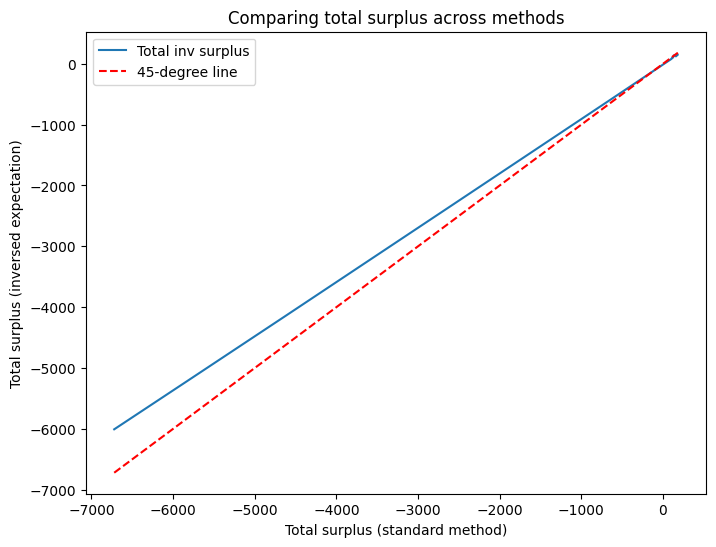

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))#This creates a figure and a set of subplots with a specific size. The size is specified in inches (width, height).

# Plot the original data
ax.plot(cc_W[p.z_0-1,:]+cc_J[p.z_0-1,:], ccinv_W[p.z_0-1,:]+ccinv_J[p.z_0-1,:], label='Total inv surplus')

# Calculate the range for the 45-degree line
x_vals = cc_W[p.z_0-1,:] + cc_J[p.z_0-1,:]
y_vals = ccinv_W[p.z_0-1,:] + ccinv_J[p.z_0-1,:]
min_val = min(min(x_vals), min(y_vals))
max_val = max(max(x_vals), max(y_vals))

# Add the 45-degree line
ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='45-degree line')

# Add titles and labels
ax.set_title('Comparing total surplus across methods')
ax.set_xlabel('Total surplus (standard method)')
ax.set_ylabel('Total surplus (inversed expectation)')
ax.legend()

# Save the plot to a file
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Total surplus comparison.png'), bbox_inches='tight')  # Save as PNG
#    plt.savefig(os.path.join(output_dir,'Total surplus comparison.pdf'), bbox_inches='tight')  # Save as PDF

# Show the plot
plt.show()

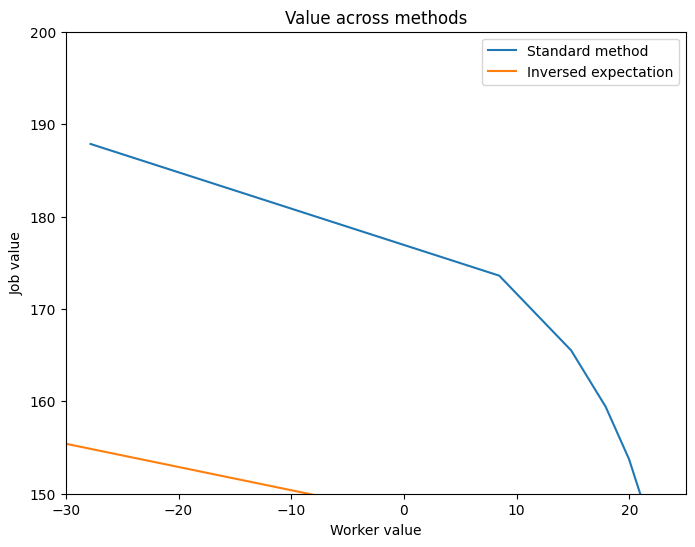

In [8]:
# Create a figure with a specific size
plt.figure(figsize=(8, 6))  # Width=16 inches, Height=12 inches

# Plot the data
plt.plot(cc_W[p.z_0-1, :], cc_J[p.z_0-1, :], label='Standard method')
plt.plot(ccinv_W[p.z_0-1,:], ccinv_J[p.z_0-1, :], label='Inversed expectation')

# Add titles and labels
plt.title('Value across methods')
plt.xlabel('Worker value')
plt.ylabel('Job value')

# Optionally set x and y limits
# plt.xlim([-30, 30])
# plt.ylim([150, 200])

# Add legend
plt.legend()

# Save the plot to a file in the specified directory
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Value across methods.png'), bbox_inches='tight')  # Save as PNG


# Optionally set x and y limits
plt.xlim([-30, 25])
plt.ylim([150, 200])
# Save the plot to a file
save=0
if save==1:
    plt.savefig(os.path.join(output_dir,'Value across methods zoom.png'), bbox_inches='tight')  # Save as PNG

# Show the plot (optional)
plt.show()

In [ ]:
min(cc_W[p.z_0-1,:] + cc_J[p.z_0-1,:])

In [ ]:
ccinv_J[p.z_0-1,:]

In [ ]:
nrows = 2
ncols = 2

plt.figure(figsize=(16, 12))
plt.subplot(nrows, ncols, 1)
plt.plot(np.log(cc.w_grid), cc_W[0, :])
plt.title('W')

plt.subplot(nrows, ncols, 2)
plt.plot(np.log(cc.w_grid), cc_J[0, :])
plt.title('J')

In [ ]:
ccinv_J[1,30]+ccinv_W[1,30]

In [ ]:
cc_J[1,30]+cc_W[1,30]

In [ ]:
ccinv_J+ccinv_W-cc_J-cc_W

In [ ]:
ccinv_W-cc_W

In [ ]:
ccinv_W[0,90]
ccinv_J[0,90]

In [ ]:
cc_W[0,91]
cc_J[0,91]

In [ ]:
ccinv_J-cc_J #larger difference, even worse at low values, even better at high values #always higher promised value though!

#Previous version, without beta

In [ ]:
ccinv_W-cc_W

In [ ]:
ccinv_J[0,:]

In [ ]:
ccinv_J[0,:]-cc_J[0,:]

In [ ]:
from BasicContract_r import BasicContract_r

bc=BasicContract_r(5,cc.js,p)

(bcr_J,bcr_W)=bc.J_K()

In [ ]:
bcr_W[0,24,:]
#bcr_J[0,24,:]

In [ ]:
cc_W[0,90]
#cc_J[0,90]
#cc_Wstar[0,90]

In [ ]:
bcr_W[0,10,:]
bcr_J[0,10,:]

In [ ]:
cc_W[0,41]
cc_J[0,41]

In [ ]:
cc_W[0,99]
cc_J[0,99]

In [ ]:
cc_Wstar[0,47]

In [ ]:
bcr_W[0,48,0]
bcr_J[0,48,0]

In [ ]:
cc_W[0,3]
#cc_J[0,3]
#cc_Wstar[0,3]

In [ ]:
bcr_J[0,50,:]

In [ ]:
bcr_W[0,40,:]
#bcr_J[0,3,:]

In [ ]:
from BasicContract import BasicContract

bc=BasicContract(3,cc.js,p)

(best_r,bc_J)=bc.J_K()

In [ ]:
cc.js.re(150)

In [ ]:
import numpy as np
best_r*bc.v_grid_0[:,np.newaxis]

In [ ]:
best_r

In [ ]:
bc.v_grid_0

## Comparisons across contracts

In [ ]:
cc_W[0,0]#=60.185
cc_J[0,0]

In [ ]:
bc_J[0]

In [ ]:
bc_J[1].shape[1]

In [ ]:
cc_W[0,4]#=69.78
cc_J[0,4]

In [ ]:
bc_J[1]

In [ ]:
cc_W[0,15]#=79.79
cc_J[0,15]

In [ ]:
bc_J[2]

In [ ]:
cc_W[0,45]#=90.01
cc_J[0,45]

In [ ]:
bc_J[3]

In [ ]:
cc_W[0,99]
cc_J[0,99]

In [ ]:
bc_J[4]

In [ ]:
15.25811404/16.986493446281656

In [ ]:
cc_W[0,197]#=110
cc_J[0,197]